# 시각화 도구

## Matplotlib

2D 평면 그래프에 관한 다양한 포맷과 기능을 지원

### 1) 선 그래프 (line plot)

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
#데이터 시각화에 사용할 matplotlib.pyplot 모듈을 "as plt"와 같이 
#약칭 plt로 임포트. 

df = pd.read_excel('./data/시도별 전출입 인구수.xlsx',engine = 'openpyxl',header=0)

In [28]:
#한글깨짐 해결
import matplotlib as mat
mat.rcParams["font.family"] = 'Malgun Gothic'

In [29]:
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


전출지별 열에 누락(NaN) 데이터가 다수 있음. \
이는 excel 파일에서 병합된 셀을 데이터 프레임으로 변환할 때 적절한 값을 찾지 못해서 그럼

fillna()\
method = 'ffill' 옵션을 사용 >> 누락 데이터가 있는 행의 바로 앞 행의 데이터 값으로 채움



In [30]:
df = df.fillna(method = 'ffill')

In [31]:
#서울에서 다른 지역으로 이동한 데이터만 추출해서 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
            # != : '같지 않은 것', 위 문항에서는 서울특별시가 아닌 것을 추출하겠다는 의미
    
df_seoul = df[mask]
df_seoul

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,서울특별시,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,서울특별시,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,서울특별시,대구광역시,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,서울특별시,인천광역시,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,서울특별시,광주광역시,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
25,서울특별시,대전광역시,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
26,서울특별시,울산광역시,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
27,서울특별시,세종특별자치시,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
28,서울특별시,경기도,130149,150313,93333,143234,149045,253705,202276,207722,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433
29,서울특별시,강원도,9352,12885,13561,16481,15479,27837,25927,25415,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


In [32]:
df_seoul = df_seoul.drop(['전출지별'], axis=1)
#전출지별의 열이 drop, 제거됨.
df_seoul

,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,대구광역시,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,인천광역시,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,광주광역시,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
25,대전광역시,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
26,울산광역시,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
27,세종특별자치시,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
28,경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433
29,강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


In [33]:
df_seoul.rename({'전입지별':'전입지'}, axis =1,inplace=True)
df_seoul.set_index('전입지',inplace=True)
df_seoul

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
울산광역시,-,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,278411,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433


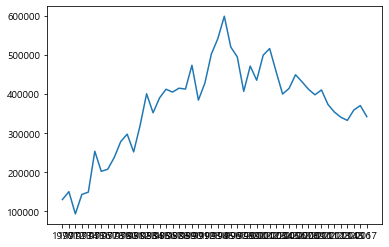

In [34]:
#서울에서 경기도로 전입한 데이터만 추출
seoul_one = df_seoul.loc['경기도']
plt.plot(seoul_one.index, seoul_one.values)
#plt.plot(seoul_one) 으로 입력해도 동일한 결과 도출

#보유하고 있는 폰트 조회
import matplotlib.font_manager as form
font_list = [font.name for in form.fontManager.ttflist]
for f in font_list:
print("{}font".format(f))


#plt figure 생성, 타이틀, 라벨, 범례, 설명 -> 원하는 부분을 추가 

plt.figure(fugsize=(14,5)        #그래프 사이즈변환

#x축을 로테이트 
plt.xticks(rotation='vertical')

plt.plot(seoul_one.index, seoul_one.values)
#title 추가 
plt.title('서울 -> 경기도 인구 이동')

xlabel과 ylabel을 정의
plt.xlabel("기간")
plt.ylabel("인구수")
plt.legend(labels=["서울 -> 경기"], loc='best')  #범례를 표시

plt.ylim(50000,800000)   #y축 데이터 리밋트 




# 주석 표시 - 화살표
plt.annotate('',
             xy=(20, 620000),       #화살표의 머리 부분(끝점)
             xytext=(2, 290000),    #화살표의 꼬리 부분(시작점)
             xycoords='data',       #좌표체계
             arrowprops=dict(arrowstyle='->', color='skyblue', lw=5), #화살표 서식
             )

plt.annotate('',
             xy=(47, 450000),       #화살표의 머리 부분(끝점)
             xytext=(30, 580000),   #화살표의 꼬리 부분(시작점)
             xycoords='data',       #좌표체계
             arrowprops=dict(arrowstyle='->', color='olive', lw=5),  #화살표 서식
             )

# 주석 표시 - 텍스트
plt.annotate('인구이동 증가(1970-1995)',  #텍스트 입력
             xy=(10, 550000),            #텍스트 위치 기준점
             rotation=25,                #텍스트 회전각도
             va='baseline',              #텍스트 상하 정렬
             ha='center',                #텍스트 좌우 정렬
             fontsize=15,                #텍스트 크기
             )

plt.annotate('인구이동 감소(1995-2017)',  #텍스트 입력
             xy=(40, 560000),            #텍스트 위치 기준점
             rotation=-11,               #텍스트 회전각도
             va='baseline',              #텍스트 상하 정렬
             ha='center',                #텍스트 좌우 정렬
             fontsize=15,                #텍스트 크기
             )

#한 화면에 여러개의 그래프 그리기
flg = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,1,1)       #subplot(전체갯수, 행의 위치, 열의 위치)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(seoul_one,'o', markersize=10)
ax2.plot(seoul_one,marker='o',markerfacecolor = 'green', markersize = 10,
         color = 'yellow', linewidth = 2, label='서울->'경기 이동 인구수)
ax2.legend(loc='best')

ax1.set_xticklabels(seoul_one.index, rotation = 75)
ax2.set_xticklabels(seoul_one.index, rotation = 75)

plt.show()


#한 화면에 여러개의 그래프 그리기
flg = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,1,1)       #subplot(전체갯수, 행의 위치, 열의 위치)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(seoul_one,'o', markersize=10)
ax2.plot(seoul_one,marker='o',markerfacecolor = 'green', markersize = 10,
         color = 'yellow', linewidth = 2, label='서울->'경기 이동 인구수)
ax2.legend(loc='best')

ax1.set_tick_params(axis='x', labelrotation = 75)
ax2.set_tick_params(axis='x', labelrotation = 75)

plt.show()


#서울에서 '충청남도', '경상북도', '강원도'로 이전한 자료만 선택, 하나의 plot에 여러개의 그래프 그림

col_years = list(map(str, range(1970,2018))     #년도 범주를 string으로 설정

df_3 = df_seoul.loc[['충청남도', '경상북도', '강원도'],col_years]
#df_3.head()

fig - plt.figure(figsize = (20,5))
ax = fig.add.subplot(1,1,1)

ax.plot(col_years,df_3.loc['충청남도', :],label = '서울' -> '충남')
ax.plot(col_years,df_3.loc['경상북도', :],label = '서울' -> '경북')
ax.plot(col_years,df_3.loc['강원도', :],label = '서울' -> '강원')

ax.legend(loc = 'best')

ax.set_title('서울 -> 충남, 경북, 강원 이동인구')
ax.set_xlabel('기간')
ax.set_ylabel('이동인구수')
ax.tick_params(axis='x', ;labelrotation =90)
plt.show()


#서울에서 '충청남도', '경상북도', '강원도', '전라남도'로 이전한 자료만 선택, 하나의 plot에 여러개의 그래프 그림

col_years = list(map(str, range(1970,2018))     #년도 범주를 string으로 설정

df_3 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'],col_years]
#df_3.head()

fig - plt.figure(figsize = (20,5))
ax1 = fig.add.subplot(2,2,1)
ax2 = fig.add.subplot(2,2,2)
ax3 = fig.add.subplot(2,2,3)
ax4 = fig.add.subplot(2,2,4)

ax1.plot(col_years,df_3.loc['충청남도', :],label = '서울' -> '충남')
ax2.plot(col_years,df_3.loc['경상북도', :],label = '서울' -> '경북')
ax3.plot(col_years,df_3.loc['강원도', :],label = '서울' -> '강원')
ax4.plot(col_years,df_3.loc['전라남도', :],label = '서울' -> '전남')

ax1.legend(loc = 'best')
ax2.legend(loc = 'best')
ax3.legend(loc = 'best')
ax4.legend(loc = 'best')   #location = best (베스트: 자기가 알아서 ㅋㅋㅋ)

ax1.set_title('서울 -> 충남, 경북, 강원 이동인구')
ax2.set_title('서울 -> 충남, 경북, 강원 이동인구')
ax3.set_title('서울 -> 충남, 경북, 강원 이동인구')
ax4.set_title('서울 -> 충남, 경북, 강원 이동인구')

ax1.set_xlabel('기간')
ax2.set_xlabel('기간')
ax3.set_xlabel('기간')
ax4.set_xlabel('기간')

ax1.set_ylabel('이동인구수')
ax2.set_ylabel('이동인구수')
ax3.set_ylabel('이동인구수')
ax4.set_ylabel('이동인구수')

ax1.tick_params(axis='x', ;labelrotation =90)
ax2.tick_params(axis='x', ;labelrotation =90)
ax3.tick_params(axis='x', ;labelrotation =90)
ax4.tick_params(axis='x', ;labelrotation =90)
plt.show()

col_years = list(map(str,range(1970,2018)))

df_4 = df.seoul.loc[['충청남도','경상북도','강원도','전라남도'],col_years]
df_4 = df_4.T   #전치행렬로 만들기
df_4.index = df_4.index.map(int)


#map()은 자료에다가 함수제공하는 방법

df_4.plot(kind='area', stacked = False, alpha = 0.2, figsize=(20,10))  #alpha : 투명도
plt.title("서울->충남, 경북, 강원, 전남")
plt.ylabel("이동인구수")
plt.xlabel("기간")
plt.legend(loc='best')

plt.show()


#자료를 면적을 갖는 그래프로 도출하는데, 기간별 면적값을 도출하는 방법도 있을까???


col_years = list(map(str,range(2010,2018)))
df_4 = df_seoul.loc[["충청남도","경상북도","강원도","전라남도"], col_years]
df_4
df_4.plot(kind='bar',width=0.7, color=['orange','green','skyblue','blue'], figsize =(20,10))

In [11]:
# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('./data/남북한발전전력량.xlsx', engine= 'openpyxl', convert_float=True)
df = df.loc[5:9]
df.drop('전력량 (억㎾h)', axis='columns', inplace=True)
df.set_index('발전 전력별', inplace=True)
df = df.T 




C:\Users\daehy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daehy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


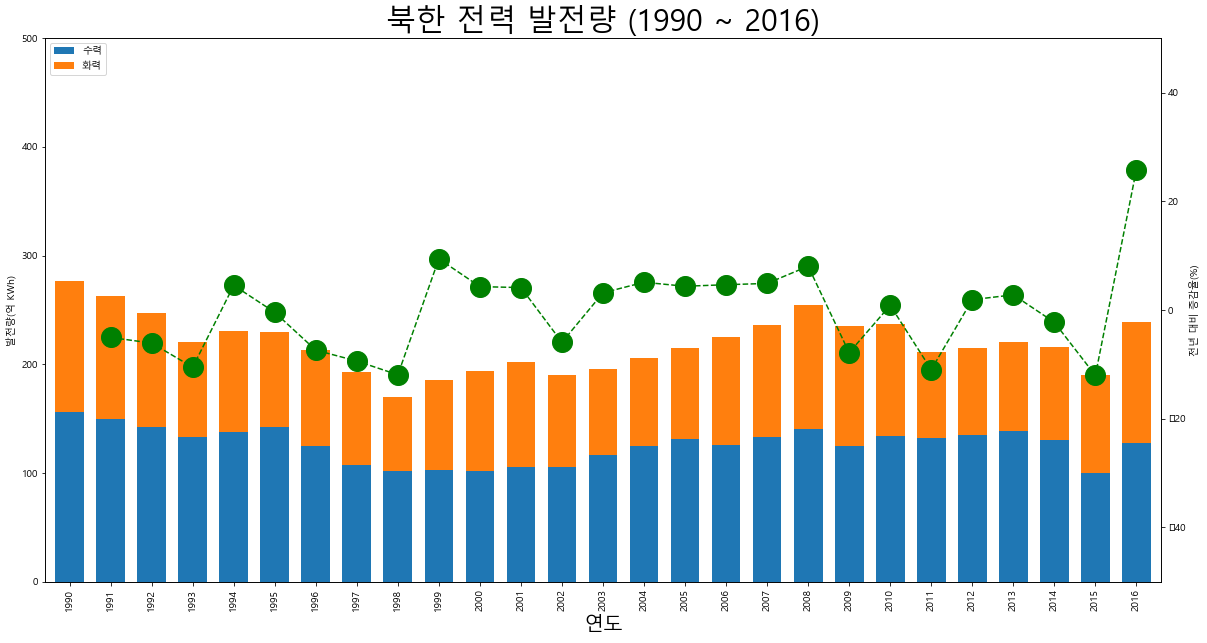

In [10]:


# 증감율(변동률) 계산
df = df.rename(columns={'합계':'총발전량'})
df['총발전량 - 1년'] = df['총발전량'].shift(1)
df['증감율'] = ((df['총발전량'] / df['총발전량 - 1년']) - 1) * 100      

# 2축 그래프 그리기
ax1 = df[['수력','화력']].plot(kind='bar', figsize=(20, 10), width=0.7, stacked=True)  
ax2 = ax1.twinx()
ax2.plot(df.index, df.증감율, ls='--', marker='o', markersize=20, 
         color='green', label='전년대비 증감율(%)')  

ax1.set_ylim(0, 500)
ax2.set_ylim(-50, 50)

ax1.set_xlabel('연도', size=20)
ax1.set_ylabel('발전량(억 KWh)')
ax2.set_ylabel('전년 대비 증감율(%)')

plt.title('북한 전력 발전량 (1990 ~ 2016)', size=30)
ax1.legend(loc='upper left')

plt.show()

In [ ]:
#plot 생성,: 사이즈, 몇개의 그래프를 그릴 것인지
#title, legend, x축, y축, 그래프타입, xlabel, ylabel
#anotate, ax1.twinx(): x축을 공유해서 그래프를 그림

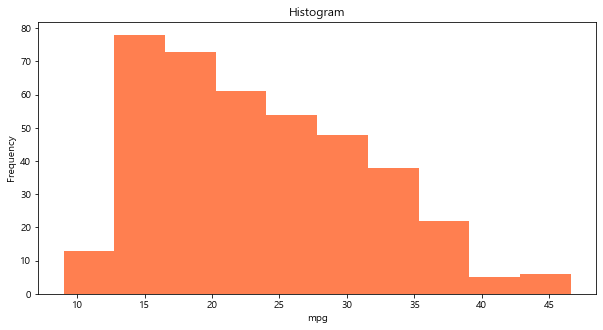

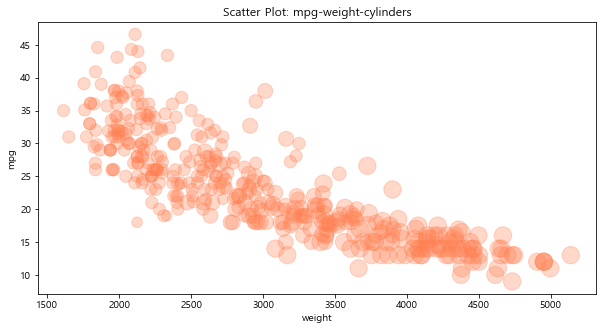

In [12]:
# read_csv() 함수로 df 생성
df = pd.read_csv('./data/auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

# 연비(mpg) 열에 대한 히스토그램 그리기
df['mpg'].plot(kind='hist', bins=10, color='coral', figsize=(10, 5))

# 그래프 꾸미기
plt.title('Histogram')
plt.xlabel('mpg')
plt.show()
# cylinders 개수의 상대적 비율을 계산하여 시리즈 생성
cylinders_size = df.cylinders / df.cylinders.max() * 300

# 3개의 변수로 산점도 그리기 
df.plot(kind='scatter', x='weight', y='mpg', c='coral', figsize=(10, 5),
        s=cylinders_size, alpha=0.3)
plt.title('Scatter Plot: mpg-weight-cylinders')
plt.show()

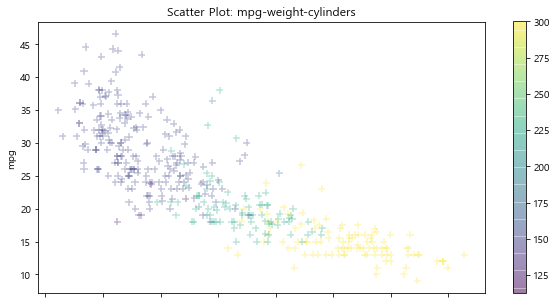

           mpg  cylinders  displacement    weight  acceleration  model year  \
origin                                                                        
1       5000.8       1556       61229.5  837121.0        3743.4       18827   
2       1952.4        291        7640.0  169631.0        1175.1        5307   
3       2405.6        324        8114.0  175477.0        1277.6        6118   

        count  
origin         
1         249  
2          70  
3          79  


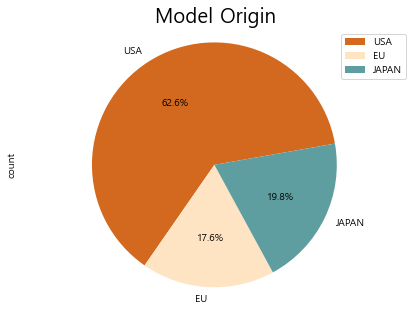

In [14]:
# cylinders 개수의 상대적 비율을 계산하여 시리즈 생성
cylinders_size = df.cylinders / df.cylinders.max() * 300

# 3개의 변수로 산점도 그리기 
df.plot(kind='scatter', x='weight', y='mpg', marker='+', figsize=(10, 5),
        cmap='viridis', c=cylinders_size, s=50, alpha=0.3)
plt.title('Scatter Plot: mpg-weight-cylinders')

plt.savefig("./scatter.png")   
plt.savefig("./scatter_transparent.png", transparent=True)   

plt.show()

# 데이터 개수 카운트를 위해 값 1을 가진 열을 추가
df['count'] = 1
df_origin = df.groupby('origin').sum()   # origin 열을 기준으로 그룹화, 합계 연산
print(df_origin.head())                  # 그룹 연산 결과 출력

# 제조국가(origin) 값을 실제 지역명으로 변경
df_origin.index = ['USA', 'EU', 'JAPAN']

# 제조국가(origin) 열에 대한 파이 차트 그리기 – count 열 데이터 사용
df_origin['count'].plot(kind='pie', 
                     figsize=(7, 5),
                     autopct='%1.1f%%',   # 퍼센트 % 표시
                     startangle=10,       # 파이 조각을 나누는 시작점(각도 표시)
                     colors=['chocolate', 'bisque', 'cadetblue']    # 색상 리스트
                     )

plt.title('Model Origin', size=20)
plt.axis('equal')    # 파이 차트의 비율을 같게 (원에 가깝게) 조정
plt.legend(labels=df_origin.index, loc='upper right')   # 범례 표시
plt.show()

boxplot은 범위내 데이터를 표시할 때 이상값, 에러를 표출하는데 좋은 방법
seaborn은 서로간의 영향을 알아보기 위한 방법


seperate  : ctrl+shift+ - 
merge cell: shift + m 
    

In [ ]:
# pip install folium, cmd에서 
# !pip install folium